## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import baselineModels
import scrapbook as sb 
import torch 
import statsModel
import bostonDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split

## Import Dataset 
### Boston Dataset 

In [3]:
X,Y = bostonDataset.boston_data()
n_features = 13 
n_samples = 506 
n_target = 1 

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 

No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.742
Model:                            OLS   Adj. R-squared (uncentered):              0.733
Method:                 Least Squares   F-statistic:                              86.32
Date:                Sat, 27 Nov 2021   Prob (F-statistic):                   3.74e-106
Time:                        10:46:28   Log-Likelihood:                         -286.40
No. Observations:                 404   AIC:                                      598.8
Df Residuals:                     391   BIC:                                      650.8
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

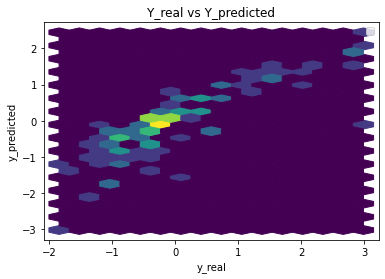

Performance Metrics
Mean Squared Error: 0.3486014488470773
Mean Absolute Error: 0.4181157646489171
Manhattan distance: 42.64780799418952
Euclidean distance: 5.962998220895415


In [5]:
[coeff,y_pred] = statsModel.statsModel(X,Y)

#Store Coefficients 
sb.glue("Coefficients",coeff)

## Random Forest 

In [6]:
mse_rf = baselineModels.randomForest(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Random Forest MSE",mse_rf)

Mean Squared error 0.10128976579132733


## Catboost 



In [7]:
mse_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Catboost MSE",mse_cb)

Learning rate set to 0.033215


0:	learn: 0.9724558	total: 58.7ms	remaining: 58.6s
1:	learn: 0.9540854	total: 59.8ms	remaining: 29.8s
2:	learn: 0.9332806	total: 60.7ms	remaining: 20.2s
3:	learn: 0.9160307	total: 61.7ms	remaining: 15.4s
4:	learn: 0.9017785	total: 62.6ms	remaining: 12.5s
5:	learn: 0.8853905	total: 63.6ms	remaining: 10.5s
6:	learn: 0.8710677	total: 64.6ms	remaining: 9.16s
7:	learn: 0.8560025	total: 65.4ms	remaining: 8.11s
8:	learn: 0.8413306	total: 66.3ms	remaining: 7.3s
9:	learn: 0.8270110	total: 67.3ms	remaining: 6.66s
10:	learn: 0.8108613	total: 68.1ms	remaining: 6.13s
11:	learn: 0.7959765	total: 69.1ms	remaining: 5.68s
12:	learn: 0.7814992	total: 70ms	remaining: 5.31s
13:	learn: 0.7691603	total: 70.8ms	remaining: 4.99s
14:	learn: 0.7553993	total: 71.7ms	remaining: 4.71s
15:	learn: 0.7424709	total: 72.5ms	remaining: 4.46s
16:	learn: 0.7308187	total: 73.3ms	remaining: 4.24s
17:	learn: 0.7186054	total: 74.2ms	remaining: 4.05s
18:	learn: 0.7067677	total: 75ms	remaining: 3.87s
19:	learn: 0.6953908	total:

120:	learn: 0.2913366	total: 159ms	remaining: 1.15s
121:	learn: 0.2901195	total: 160ms	remaining: 1.15s
122:	learn: 0.2886444	total: 160ms	remaining: 1.14s
123:	learn: 0.2868022	total: 161ms	remaining: 1.14s
124:	learn: 0.2859904	total: 162ms	remaining: 1.13s
125:	learn: 0.2847863	total: 163ms	remaining: 1.13s
126:	learn: 0.2836561	total: 164ms	remaining: 1.12s
127:	learn: 0.2824969	total: 164ms	remaining: 1.12s
128:	learn: 0.2812032	total: 165ms	remaining: 1.12s
129:	learn: 0.2803313	total: 166ms	remaining: 1.11s
130:	learn: 0.2789044	total: 167ms	remaining: 1.11s
131:	learn: 0.2780844	total: 168ms	remaining: 1.1s
132:	learn: 0.2770530	total: 169ms	remaining: 1.1s
133:	learn: 0.2757657	total: 169ms	remaining: 1.09s
134:	learn: 0.2749284	total: 170ms	remaining: 1.09s
135:	learn: 0.2740248	total: 171ms	remaining: 1.08s
136:	learn: 0.2729602	total: 172ms	remaining: 1.08s
137:	learn: 0.2717215	total: 172ms	remaining: 1.08s
138:	learn: 0.2707326	total: 173ms	remaining: 1.07s
139:	learn: 0.

160:	learn: 0.2498761	total: 191ms	remaining: 998ms
161:	learn: 0.2492165	total: 192ms	remaining: 996ms
162:	learn: 0.2482532	total: 193ms	remaining: 993ms
163:	learn: 0.2473016	total: 194ms	remaining: 990ms
164:	learn: 0.2464853	total: 195ms	remaining: 987ms
165:	learn: 0.2459280	total: 196ms	remaining: 984ms
166:	learn: 0.2453154	total: 197ms	remaining: 980ms
167:	learn: 0.2444399	total: 197ms	remaining: 978ms
168:	learn: 0.2437870	total: 198ms	remaining: 975ms
169:	learn: 0.2431145	total: 199ms	remaining: 972ms
170:	learn: 0.2425363	total: 200ms	remaining: 969ms
171:	learn: 0.2417307	total: 201ms	remaining: 966ms
172:	learn: 0.2410590	total: 201ms	remaining: 963ms
173:	learn: 0.2402149	total: 202ms	remaining: 960ms
174:	learn: 0.2395868	total: 203ms	remaining: 957ms
175:	learn: 0.2388818	total: 204ms	remaining: 954ms
176:	learn: 0.2380916	total: 205ms	remaining: 952ms
177:	learn: 0.2370762	total: 205ms	remaining: 948ms
178:	learn: 0.2365069	total: 206ms	remaining: 946ms
179:	learn: 

230:	learn: 0.2028094	total: 249ms	remaining: 828ms
231:	learn: 0.2025106	total: 250ms	remaining: 826ms
232:	learn: 0.2020038	total: 250ms	remaining: 824ms
233:	learn: 0.2015299	total: 251ms	remaining: 822ms
234:	learn: 0.2009152	total: 252ms	remaining: 820ms
235:	learn: 0.2004471	total: 253ms	remaining: 818ms
236:	learn: 0.1999553	total: 254ms	remaining: 816ms
237:	learn: 0.1996052	total: 254ms	remaining: 814ms
238:	learn: 0.1988919	total: 255ms	remaining: 812ms
239:	learn: 0.1982434	total: 256ms	remaining: 811ms
240:	learn: 0.1973355	total: 257ms	remaining: 809ms
241:	learn: 0.1967531	total: 258ms	remaining: 807ms
242:	learn: 0.1963145	total: 258ms	remaining: 805ms
243:	learn: 0.1956971	total: 259ms	remaining: 803ms
244:	learn: 0.1953450	total: 260ms	remaining: 801ms
245:	learn: 0.1948542	total: 261ms	remaining: 799ms
246:	learn: 0.1942590	total: 262ms	remaining: 798ms
247:	learn: 0.1936053	total: 263ms	remaining: 798ms
248:	learn: 0.1930859	total: 264ms	remaining: 796ms
249:	learn: 

350:	learn: 0.1554065	total: 349ms	remaining: 645ms
351:	learn: 0.1549342	total: 350ms	remaining: 645ms
352:	learn: 0.1545325	total: 351ms	remaining: 644ms
353:	learn: 0.1541362	total: 352ms	remaining: 642ms
354:	learn: 0.1537842	total: 353ms	remaining: 641ms
355:	learn: 0.1536175	total: 354ms	remaining: 640ms
356:	learn: 0.1532653	total: 354ms	remaining: 638ms
357:	learn: 0.1529820	total: 355ms	remaining: 637ms
358:	learn: 0.1527242	total: 356ms	remaining: 636ms
359:	learn: 0.1521248	total: 357ms	remaining: 634ms
360:	learn: 0.1518160	total: 358ms	remaining: 633ms
361:	learn: 0.1515064	total: 358ms	remaining: 632ms
362:	learn: 0.1510823	total: 359ms	remaining: 630ms
363:	learn: 0.1506657	total: 360ms	remaining: 629ms
364:	learn: 0.1503698	total: 361ms	remaining: 628ms
365:	learn: 0.1500011	total: 362ms	remaining: 626ms
366:	learn: 0.1498326	total: 362ms	remaining: 625ms
367:	learn: 0.1494985	total: 363ms	remaining: 624ms
368:	learn: 0.1491530	total: 364ms	remaining: 623ms
369:	learn: 

390:	learn: 0.1424036	total: 382ms	remaining: 595ms
391:	learn: 0.1420016	total: 383ms	remaining: 594ms
392:	learn: 0.1418503	total: 384ms	remaining: 592ms
393:	learn: 0.1417623	total: 384ms	remaining: 591ms
394:	learn: 0.1415973	total: 385ms	remaining: 590ms
395:	learn: 0.1414547	total: 386ms	remaining: 589ms
396:	learn: 0.1409756	total: 387ms	remaining: 587ms
397:	learn: 0.1406868	total: 387ms	remaining: 586ms
398:	learn: 0.1405280	total: 388ms	remaining: 585ms
399:	learn: 0.1400286	total: 389ms	remaining: 584ms
400:	learn: 0.1397604	total: 390ms	remaining: 583ms
401:	learn: 0.1394952	total: 391ms	remaining: 582ms
402:	learn: 0.1392383	total: 392ms	remaining: 580ms
403:	learn: 0.1390712	total: 393ms	remaining: 579ms
404:	learn: 0.1387387	total: 393ms	remaining: 578ms
405:	learn: 0.1385974	total: 394ms	remaining: 577ms
406:	learn: 0.1383617	total: 395ms	remaining: 575ms
407:	learn: 0.1381421	total: 396ms	remaining: 574ms
408:	learn: 0.1378580	total: 396ms	remaining: 573ms
409:	learn: 

460:	learn: 0.1258343	total: 439ms	remaining: 513ms
461:	learn: 0.1256241	total: 440ms	remaining: 512ms
462:	learn: 0.1253665	total: 440ms	remaining: 511ms
463:	learn: 0.1250553	total: 441ms	remaining: 510ms
464:	learn: 0.1247838	total: 442ms	remaining: 509ms
465:	learn: 0.1244728	total: 443ms	remaining: 507ms
466:	learn: 0.1240831	total: 443ms	remaining: 506ms
467:	learn: 0.1240580	total: 444ms	remaining: 505ms
468:	learn: 0.1237595	total: 445ms	remaining: 504ms
469:	learn: 0.1234735	total: 446ms	remaining: 503ms
470:	learn: 0.1231668	total: 447ms	remaining: 502ms
471:	learn: 0.1227151	total: 447ms	remaining: 500ms
472:	learn: 0.1226898	total: 448ms	remaining: 499ms
473:	learn: 0.1223972	total: 449ms	remaining: 498ms
474:	learn: 0.1221879	total: 450ms	remaining: 497ms
475:	learn: 0.1220073	total: 451ms	remaining: 496ms
476:	learn: 0.1217799	total: 451ms	remaining: 495ms
477:	learn: 0.1215128	total: 452ms	remaining: 494ms
478:	learn: 0.1213445	total: 454ms	remaining: 493ms
479:	learn: 

583:	learn: 0.1018199	total: 539ms	remaining: 384ms
584:	learn: 0.1015879	total: 540ms	remaining: 383ms
585:	learn: 0.1013584	total: 540ms	remaining: 382ms
586:	learn: 0.1012333	total: 541ms	remaining: 381ms
587:	learn: 0.1009989	total: 542ms	remaining: 380ms
588:	learn: 0.1007913	total: 543ms	remaining: 379ms
589:	learn: 0.1006968	total: 544ms	remaining: 378ms
590:	learn: 0.1005325	total: 544ms	remaining: 377ms
591:	learn: 0.1003824	total: 545ms	remaining: 376ms
592:	learn: 0.1001231	total: 546ms	remaining: 375ms
593:	learn: 0.1001090	total: 547ms	remaining: 374ms
594:	learn: 0.0999516	total: 548ms	remaining: 373ms
595:	learn: 0.0997636	total: 549ms	remaining: 372ms
596:	learn: 0.0996516	total: 549ms	remaining: 371ms
597:	learn: 0.0995173	total: 550ms	remaining: 370ms
598:	learn: 0.0992399	total: 551ms	remaining: 369ms
599:	learn: 0.0992223	total: 552ms	remaining: 368ms
600:	learn: 0.0990545	total: 553ms	remaining: 367ms
601:	learn: 0.0988786	total: 554ms	remaining: 366ms
602:	learn: 

622:	learn: 0.0955532	total: 572ms	remaining: 346ms
623:	learn: 0.0953645	total: 572ms	remaining: 345ms
624:	learn: 0.0952489	total: 573ms	remaining: 344ms
625:	learn: 0.0951462	total: 574ms	remaining: 343ms
626:	learn: 0.0949930	total: 575ms	remaining: 342ms
627:	learn: 0.0948017	total: 576ms	remaining: 341ms
628:	learn: 0.0947516	total: 577ms	remaining: 340ms
629:	learn: 0.0945976	total: 577ms	remaining: 339ms
630:	learn: 0.0943695	total: 578ms	remaining: 338ms
631:	learn: 0.0943057	total: 579ms	remaining: 337ms
632:	learn: 0.0941016	total: 580ms	remaining: 337ms
633:	learn: 0.0940133	total: 581ms	remaining: 335ms
634:	learn: 0.0938232	total: 582ms	remaining: 334ms
635:	learn: 0.0936059	total: 583ms	remaining: 333ms
636:	learn: 0.0933766	total: 583ms	remaining: 332ms
637:	learn: 0.0932197	total: 585ms	remaining: 332ms
638:	learn: 0.0931023	total: 586ms	remaining: 331ms
639:	learn: 0.0928519	total: 587ms	remaining: 330ms
640:	learn: 0.0926591	total: 588ms	remaining: 329ms
641:	learn: 

690:	learn: 0.0855321	total: 629ms	remaining: 281ms
691:	learn: 0.0853685	total: 630ms	remaining: 280ms
692:	learn: 0.0852102	total: 631ms	remaining: 279ms
693:	learn: 0.0850739	total: 631ms	remaining: 278ms
694:	learn: 0.0849808	total: 632ms	remaining: 277ms
695:	learn: 0.0849687	total: 633ms	remaining: 276ms
696:	learn: 0.0848374	total: 634ms	remaining: 276ms
697:	learn: 0.0846431	total: 635ms	remaining: 275ms
698:	learn: 0.0844545	total: 635ms	remaining: 274ms
699:	learn: 0.0843930	total: 636ms	remaining: 273ms
700:	learn: 0.0842504	total: 637ms	remaining: 272ms
701:	learn: 0.0841246	total: 638ms	remaining: 271ms
702:	learn: 0.0840159	total: 639ms	remaining: 270ms
703:	learn: 0.0838422	total: 640ms	remaining: 269ms
704:	learn: 0.0837153	total: 640ms	remaining: 268ms
705:	learn: 0.0835080	total: 641ms	remaining: 267ms
706:	learn: 0.0833989	total: 642ms	remaining: 266ms
707:	learn: 0.0832842	total: 643ms	remaining: 265ms
708:	learn: 0.0831340	total: 644ms	remaining: 264ms
709:	learn: 

812:	learn: 0.0720309	total: 729ms	remaining: 168ms
813:	learn: 0.0720179	total: 730ms	remaining: 167ms
814:	learn: 0.0719324	total: 731ms	remaining: 166ms
815:	learn: 0.0719202	total: 731ms	remaining: 165ms
816:	learn: 0.0717650	total: 732ms	remaining: 164ms
817:	learn: 0.0717222	total: 733ms	remaining: 163ms
818:	learn: 0.0715929	total: 734ms	remaining: 162ms
819:	learn: 0.0714514	total: 735ms	remaining: 161ms
820:	learn: 0.0713893	total: 736ms	remaining: 160ms
821:	learn: 0.0712371	total: 737ms	remaining: 160ms
822:	learn: 0.0710940	total: 738ms	remaining: 159ms
823:	learn: 0.0709939	total: 738ms	remaining: 158ms
824:	learn: 0.0709027	total: 739ms	remaining: 157ms
825:	learn: 0.0708331	total: 740ms	remaining: 156ms
826:	learn: 0.0706904	total: 741ms	remaining: 155ms
827:	learn: 0.0706807	total: 741ms	remaining: 154ms
828:	learn: 0.0705977	total: 742ms	remaining: 153ms
829:	learn: 0.0705366	total: 743ms	remaining: 152ms
830:	learn: 0.0704831	total: 744ms	remaining: 151ms
831:	learn: 

852:	learn: 0.0684723	total: 762ms	remaining: 131ms
853:	learn: 0.0683497	total: 763ms	remaining: 130ms
854:	learn: 0.0682148	total: 764ms	remaining: 129ms
855:	learn: 0.0680714	total: 764ms	remaining: 129ms
856:	learn: 0.0679660	total: 765ms	remaining: 128ms
857:	learn: 0.0679389	total: 766ms	remaining: 127ms
858:	learn: 0.0678846	total: 767ms	remaining: 126ms
859:	learn: 0.0678066	total: 768ms	remaining: 125ms
860:	learn: 0.0676877	total: 768ms	remaining: 124ms
861:	learn: 0.0675790	total: 769ms	remaining: 123ms
862:	learn: 0.0674366	total: 770ms	remaining: 122ms
863:	learn: 0.0673239	total: 771ms	remaining: 121ms
864:	learn: 0.0672752	total: 771ms	remaining: 120ms
865:	learn: 0.0672180	total: 772ms	remaining: 120ms
866:	learn: 0.0672084	total: 773ms	remaining: 119ms
867:	learn: 0.0672006	total: 774ms	remaining: 118ms
868:	learn: 0.0671841	total: 775ms	remaining: 117ms
869:	learn: 0.0670531	total: 776ms	remaining: 116ms
870:	learn: 0.0669584	total: 776ms	remaining: 115ms
871:	learn: 

923:	learn: 0.0627221	total: 820ms	remaining: 67.4ms
924:	learn: 0.0626734	total: 821ms	remaining: 66.6ms
925:	learn: 0.0626657	total: 822ms	remaining: 65.7ms
926:	learn: 0.0626104	total: 822ms	remaining: 64.8ms
927:	learn: 0.0624954	total: 823ms	remaining: 63.9ms
928:	learn: 0.0623646	total: 824ms	remaining: 63ms
929:	learn: 0.0623185	total: 825ms	remaining: 62.1ms
930:	learn: 0.0622311	total: 825ms	remaining: 61.2ms
931:	learn: 0.0621793	total: 826ms	remaining: 60.3ms
932:	learn: 0.0621102	total: 827ms	remaining: 59.4ms
933:	learn: 0.0620615	total: 828ms	remaining: 58.5ms
934:	learn: 0.0619487	total: 829ms	remaining: 57.6ms
935:	learn: 0.0618296	total: 829ms	remaining: 56.7ms
936:	learn: 0.0617766	total: 830ms	remaining: 55.8ms
937:	learn: 0.0616637	total: 831ms	remaining: 54.9ms
938:	learn: 0.0615721	total: 832ms	remaining: 54ms
939:	learn: 0.0614922	total: 833ms	remaining: 53.1ms
940:	learn: 0.0614515	total: 833ms	remaining: 52.3ms
941:	learn: 0.0613509	total: 834ms	remaining: 51.4

## Vanilla Neural Network 

In [8]:
# Parameters 
n_epochs = 5000
batch_size = 100
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
baselineModels.vanillaNeuralNetwork(train_data,test_data,batch_size,n_features,n_target,n_epochs)

Mean Squared error 0.8615815218185147
